Muslimov Arthur, Last Checkpoint: 02/28/2020
                 Last Checkpoint: 11/29/2021

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [7]:
%xmode Minimal

Exception reporting mode: Minimal


*В* **этом** ***разделе*** ты увидишь использование булевых масок. "Маскирование удобно<br/>
для извлечения, модификации, подсчёта или других манипуляций со значениями<br/>
в массиве по какому-либо критерию". Например, тебе нужно узнать сколько<br/>
солнечных дней было в прошлом году или, возможно, отсеить аномалии, когда<br/>
за несколько дней по показателям выпадала половина месячной нормы осадков.<br/>
"В библиотеке NumPy булевы маски зачастую самый эффективный способ решения<br/>
подобных задач."

## Пример: подсчёт количества дождливых дней

In [14]:
days = pd.read_csv("./data/Seattle2014.csv")['PRCP'].values
rain_inches = days / 254  # 1/10мм -> дюймы
rain_inches.shape

(365,)

365 дней. Всё правильно. Давай теперь построим график.

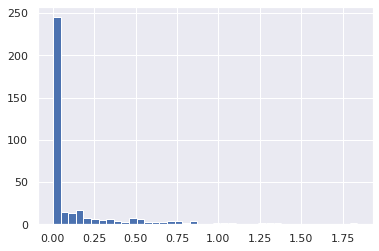

In [15]:
%matplotlib inline
    # помни, в командной строке такого нет
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.hist(rain_inches, 40);  
    # ; - мы же не хотим получить ещё и весь массив на выходе

Видишь еле заметные полоски снизу? Это тоже показатели, но от столбцов   <br/>
осталась только верхушка в виде белой оконтовки. Видимо, это одно        <br/>
из обновлений, т.к. в книге все столбцы хорошо видны. Ещё в книге на     <br/>
картике нет пробела перед первым столбцом. Ну ладно, я так отдыхаю,      <br/>
описывая незначительные вещи в перерыве между делом.                     

Теперь ты видишь общую картину на этой гистограмме. Вопреки расхожему  <br/>
мнению, в большинстве дней в Сиэтле в тот год не выпало и капли.       <br/>
Однако, по ней нельзя точно сказать, например, сколько дней прошло     <br/>
без дождя. Как и сколько осадков выпало вообще.                        <br/>

"**Углубляемся в изучение данных**". Ты, конечно, можешь попробывать       <br/>
ответить на эти вопросы своими силами, но мы это уже обсуждали.            <br/>
Лучше использовать эффективные универсальные функции для поэлементного     <br/>
выполнения операций. Так выйдет быстрее и безопаснее.                      <br/>
"В то же время можно использовать универсальные функции для поэлементного  <br/>
*сравнения* в массивах, после чего применять результат для ответа на       <br/>
интересующие нас вопросы. Мы ненадолго отложим наши данные в сторону       <br/>
и обсудим некоторые общие инструменты библиотеки NumPy, позволяющие        <br/>
применять *маскирование* (masking) для быстрого ответа на подобные         <br/>
вопросы". <То, что я отмечаю кавычками - дословные цитаты из книги.        <br/>
Мне они просто нравятся.> 

## Операторы сравнения как универсальные функции

Ты уже видел как работают арифметические универсальные функции,  <br/>
вроде + и -. В NumPy также есть функции сравнения, как > и <.    <br/>
И тоже в виде универсальных функций. Их результат - это массив   <br/>
True или False - это смотря как выполняет условие элемент.       

In [16]:
x = np.array([1, 2, 3, 4, 5])  # или np.arange(1, 6)

In [17]:
x < 3  # меньше?

array([ True,  True, False, False, False])

In [18]:
x > 3  # больше?

array([False, False, False,  True,  True])

In [19]:
x <= 3  # меньше или равно?

array([ True,  True,  True, False, False])

In [20]:
x >= 3  # больше или равно?

array([False, False,  True,  True,  True])

In [21]:
x == 3  # равно?

array([False, False,  True, False, False])

In [22]:
x != 3  # не равно?

array([ True,  True, False,  True,  True])

В общем, всё также, как и с числами, но с поправкой на транслирование.  <br/>
Также можно строить и констркуции посложнее.

In [23]:
(x * 2) == (x ** 2)  # ну разве не прекрасно?

array([False,  True, False, False, False])

По аналогии с арифметическими коллегами, здешние операторы - это всего лишь       <br/>
обёртка над универсальными функциями. И ты также захочешь испльзовать их, т.к.   <br/>
они поддерживают ещё и доп. фишки. Например, настройка параметра out.          

In [14]:
np.less(x, 3)  # или x < 3

array([ True,  True, False, False, False])

**Оператор** | **Эквивалентная универсальная функция**
:-----------|:----------
==    | *np.equal()*
!=    | *np.not_equal()*
<     | *np.less()*
<=    | *np.less_equal()*
\>     | *np.greater()*
\>=    | *np.greater_equal()*

Как ты понял, это родня арифметическим универсальным функциям.        <br/>
Универсальные функции сравнения также умеют работать с многомерными  <br/>
массивами любого размера и формы.

In [24]:
rng = np.random.RandomState(0)  # мы как-бы создаём свой генератор с состоянием 0
x = rng.randint(1, 11, size=(3, 4))  # тоже, что np.random.randint() с семенем 0
x

array([[ 6,  1,  4,  4],
       [ 8, 10,  4,  6],
       [ 3,  5,  8,  7]])

In [25]:
x < 5  # или же np.less(x, 5)

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True, False, False, False]])

Как и полагается, во всех случаях возвращяется булевый массив, а NumPy умеет  <br/>
работать с булевыми массивами, ведь у него есть набор простых паттернов.

## Работа с булевыми массивами

Для булёвых массивов в NumPy заготовлена множество удобных операций.

## Подсчёт количества элементов

Тебе нужно узнать сколько True-элементов в массиве? Это случай np.count_nonzero().

In [27]:
np.count_nonzero(x < 5)  # сколько элементов меньше 5?

5

Да, и впрадву 5, я проверил. Ещё можно использовать функцию np.sum().  <br/>
True для неё - это 1, а False - 0. Всё по какону Си.

In [28]:
np.sum(x < 5)  # это функция агрегирования

5

Также не стоит забывать про параметр axis. Полезная штука.

In [29]:
np.count_nonzero(x < 5, axis=1)

array([3, 1, 1])

Видимо, раньше у np.sum() было преимущество в виде возможности настраивать  <br/>
ось проведения операции параметром axis. Об этом написано в книге. Но, как  <br/>
мы видим, np.count_nonzero() тоже умеет так делать. Научился, наверное.

Если ты хочешь знать, есть ли хоть один True-элемент в массиве, или все ли элементы  <br/>
True, можешь воспользоваться универсальными функциями **np.any()** и **np.all()**.

In [20]:
x  # для напоминания

array([[ 6,  1,  4,  4],
       [ 8, 10,  4,  6],
       [ 3,  5,  8,  7]])

In [21]:
np.any(x > 9)  # хоть один из них больше девяти?

True

In [22]:
np.all(x == 7)  # везде ли тут 7-ки?

False

Эти братья тоже знакомы с axis.

In [23]:
np.all(x > 3, axis=1)

array([False,  True, False])

Да, вторая строка и впрадву отличилась по минимуму.

Ну и напоследок, хотелось бы предупредить насчёт встроенных в Python функций         <br/>
**sum()**, **any()** и **all()**. Они могут вести себя непредсказуемо со вложенными  <br/>
массивами. Да, я знаю, что приставку **np.** ты уже пишешть по инерции, но           <br/>
всё-таки лучше лишний раз напомнить об этом, чтобы потом не было конфузов.     

## Булевы операторы

Ты уже сможешь подсчитать дни с осадками больше 2 дюймов, или меньше 4.       <br/>
Но что делать, если тебе нужно узнать кол-во дней с осадками в промежутке     <br/>
между этими 2 и 4 дюймами? Это можно сделать, прибегая к помощи *побитовых*   <br/>
*логических операторов* (bitwise logic operators) языка Python: &, |, ^ и ~.  <br/>
Аналогично обычным арифметическим операторам, NumPy перегружает их как        <br/>
универсальные функции. Это значит, что они также работают поэлементно.       

Вот банальный вариант решения этой задачки.

In [51]:
np.sum( (rain_inches >= 0.2) & (rain_inches <= 0.4) )  # так же, как и с числами, но и с поправкой на транслирование

28

"Видим, что в 2014 году в Сиэтле было 28 дней с толщиной слоя осадков от 0.2 до 0.4 дюймов"

Заметь, что стандартное для Python ключевой слово and здесь работать не будет.

Стоит сказать, что скобки здесь отнюдь не для красоты. Помни, что приоритет  <br/>
стоит у побитовых операторов. Без скобок приоритет бы выглядил так:

In [52]:
rain_inches >= (2 & rain_inches) <= 4  # будет ошибка, т.к. (int)2 & (floats)rain_inches не ладят

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

Верное выражение можно записать и другим видом.

In [54]:
np.sum( ~( (rain_inches <= 0.4) | (rain_inches >= 1) ) )

39

Как ты понимаешь, простор для воображения огромен. Именно по таким принципам  <br/>
устроен низчайший мир работы компьютера, где 1 - это True, а 0 - это False.

А вот и таблица с универсальными функциями.

**Оператор** | **Эквивалентная универсальная функция**
:------------|:----
&            |*np.bitwise_and()*
\|           |*np.bitwise_or()*
^            |*np.bitwise_xor()*
~            |*np.bitwise_not()*

"С помощью этих инструментов можно начать отвечать на различные типы вопросов  <br/>
относительно наших данных по осадкам. Вот примеры результатов, которые можно   <br/>
вычислить путём сочетания маскирования с агрегированием:"

In [55]:
print("Number days without rain    : ", np.sum(rain_inches == 0))
print("Number days with rain       : ", np.sum(rain_inches != 0))
print("Days with more than 0.5 inches: ", np.sum(rain_inches > 0.5))
print("Rainy days with < 0.1 inches  : ", np.sum(rain_inches < 0.1))

Number days without rain    :  215
Number days with rain       :  150
Days with more than 0.5 inches:  37
Rainy days with < 0.1 inches  :  261


## Булевы массивы как маски

Подсчитывание кол-ва элементов, удовлетворяющих условие, конечно хорошо, но получение  <br/>
самих элементов ещё лучше! Сейчас ты научишься надевать булевы маски на массивы.

In [28]:
x  # ещё раз напомню нашего подопытного

array([[ 6,  1,  4,  4],
       [ 8, 10,  4,  6],
       [ 3,  5,  8,  7]])

Ты уже знаешь как по условию получать булевый массив отсюда.

In [29]:
x > 5

array([[ True, False, False, False],
       [ True,  True, False,  True],
       [False, False,  True,  True]])

Чтобы выбрать нужные значения, т.е. те, что прошли тест, нужно проиндексировать наш  <br/>
массив этим булевым массивом. Другими словами, сунуть булевый массив как индекс.     <br/> 
> Такое действие называется операцией ***наложения*** или ***маскирования***.

In [30]:
x[x > 5]  # булевый массив, выдаваемый условием, сразу становится индексом

array([ 6,  8, 10,  6,  8,  7])

И мы получили те значения, что больше 5 в виде одномерного массива.   <br/>
Те элементы, под индексами которых в булевом массиве-маске красуется  <br/>
True, попали в наш итоговый, можно сказать, отсеянный массив.

Теперь этот массив можно использовать там, где он может пригодиться. Например,  <br/>
давай по такому же принципу вытянем интересные сводные показатели по Сиетлу.

In [57]:
rainy = rain_inches > 0  # дни, когда выпала хоть одна капля
summer = (np.arange(365) >= 152) & (np.arange(365) <= 243) # 152 день - это 1 июня, а 243 - это 31 августа
    # или мой медленный вариант - summer = np.array([152 <= i <= 243 for i in range(365)])
    # как оказалось, ванильный range() работает гораздо быстрее np.arange()

print("Seattle statistical summary, 2014.", end="\n\n")

print("Median precip on rainy days in 2014 (inches): ", np.median(rain_inches[rainy]))
print("Median precip on summer days in 2014 (inches): ", np.median(rain_inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ", np.max(rain_inches[summer]))
print("Median precip on non-summer rainy days (intches): ", np.median(rain_inches[rainy & ~summer]))

Seattle statistical summary, 2014.

Median precip on rainy days in 2014 (inches):  0.19488188976377951
Median precip on summer days in 2014 (inches):  0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (intches):  0.2047244094488189


> Путём сочетания булевых операций, операций маскирования и агрегирования  <br/>
> можно очень быстро и легко отвечать на подобные вопросы относительно нашего  <br/>
> набора данных

## Использование ключевых слов and/or по сравнению с использованием операторов &/|

Ты, наверное, уже задавался вопросом, почему бы не использовать привычные `and` и `or`  <br/>
для работы с булевыми массивами. Это может привести к путаннице.

А различие вот в чём: `and` и `or` определяют истенность всего объекта в целом,  <br/>
а побитовые `&` и `|` работают с отдельными битами.

In [32]:
bool(12), bool(0)

(True, False)

In [36]:
bool(12 or 0)  # 12 -> True  and   0 -> True

True

In [33]:
bin(12), bin(0)

('0b1100', '0b0')

In [40]:
bool(12 | 0)  # 12 -> 1100
              # 0  -> 0000
              #       1100 -> True

True

Тоже самое происходит и с булевыми массивами. Их можно рассмотривать как набор битов.

In [58]:
A = np.array([1, 1, 0, 0], dtype="bool")  # 1100 -> 12
B = np.array([0, 1, 0, 1], dtype="bool")  # 0101 -> 5
A | B  # -> 13

array([ True,  True, False,  True])

Использование `and` и `or` для работы с массивами, даже булевыми, вызовет исключение.

In [44]:
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

В общем, помни, что для работы с массивами тебе почти всегда нужны будут именно побитовые операторы.